In [1]:
!pip install -q tensorflow==2.0.0-alpha0

    100% |████████████████████████████████| 79.9MB 333kB/s 
    100% |████████████████████████████████| 419kB 21.0MB/s 
    100% |████████████████████████████████| 3.0MB 10.6MB/s 
    100% |████████████████████████████████| 61kB 23.0MB/s 


In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


# Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the Dataset

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

# Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

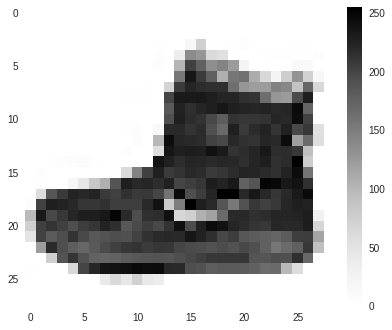

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

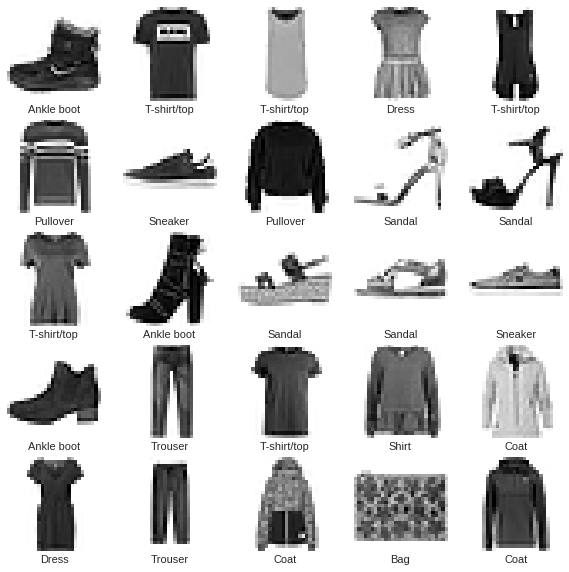

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like **tf.keras.layers.Dense**, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network,** tf.keras.layers**. **Flatten**, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two **tf.keras.layers.Dense** layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

*Optimizer *—This is how the model is updated based on the data it sees and its loss function.

*Metrics *—Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:




1.  Feed the training data to the model—in this example, the train_images and train_labels arrays.

2.   The model learns to associate images and labels.

3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.


To start training, call the **model.fit** method—the model is "fit" to the training data:

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5010 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3766 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3376 - accuracy: 0.8761
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3097 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2927 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2777 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2549 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2467 - accuracy: 0.9077
Epoch 10/10
60000/60000 [============

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.89 (or 89%) on the training data.

# Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.3341 - accuracy: 0.8867

Test accuracy: 0.8867


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [34]:
predictions[0]

array([4.5556021e-08, 8.4150902e-11, 1.0143149e-09, 3.1483722e-11,
       4.3217607e-09, 2.7812556e-03, 2.0562160e-08, 8.1216358e-03,
       4.5357304e-08, 9.8909700e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [35]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [36]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

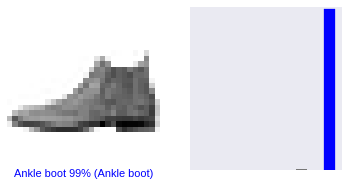

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

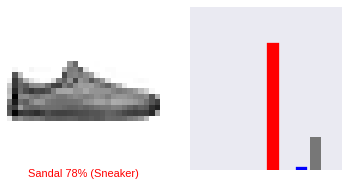

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

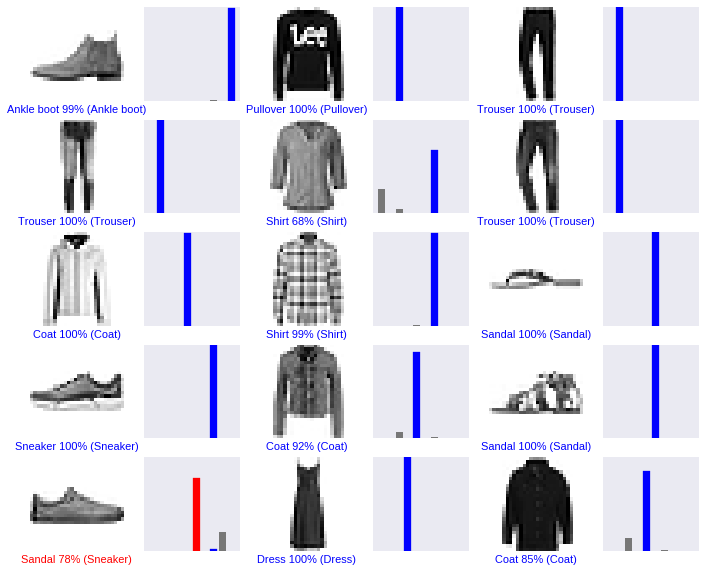

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [41]:
img = test_images[0]

print(img.shape)

(28, 28)


**tf.keras** models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [42]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [43]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.5556110e-08 8.4150735e-11 1.0143149e-09 3.1483666e-11 4.3217607e-09
  2.7812556e-03 2.0562199e-08 8.1216469e-03 4.5357215e-08 9.8909700e-01]]


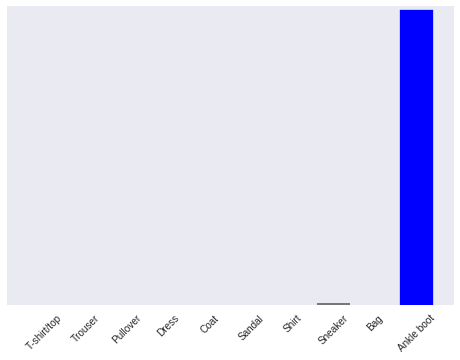

In [44]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**model.predict** returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [46]:
np.argmax(predictions_single[0])

9